# Model Building For BoomBikes Dataset
### By: Prateek Rana

## Problem Statement:

> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

> The company wants to know: 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

> Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
# Import warnings

import warnings
warnings.simplefilter("ignore")

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np

## Exploratory Data Analysis Of The Bikeshare Data

### Variable Identification:

In [3]:
# Loading dataset
bikeshare = pd.read_csv("day.csv")
bikeshare

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Shape of the dataset
bikeshare.shape

(730, 16)

In [5]:
# Info of the dataset
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

> Here we can see that we dont have any missing values. We have 730 rows and 16 columns. We have data for 2 whole years from 1st Jan 2018 till 31st Dec 2019.

However, some things need to be mended: 

- Change dtype of dteday column.
- Categorise the `season` values. Instead of numbers use season names.
- Categorise the `mnth` values. Instead of numbers use month names.
- Categorise the `yr` values. Instead of 0 or 1 use year.
- Categorise the `holiday` values. Instead of 0 or 1 use Yes or No.
- Categorise the `weekday` values. Instead of numbers use weekday names.
- Categorise the `workingday` values. Instead of 0 or 1 use Yes or No.
- Categorise the `weathersit` values. Instead of numbers describe the type of weather.

In [6]:
# Changing dtype of dteday column
bikeshare['dteday'] = bikeshare['dteday'].astype('datetime64')

In [7]:
# Modifying the column season

def cat_season(x):
    if x == 1:
        return 'spring'
    if x == 2:
        return 'summer'
    if x == 3:
        return 'fall'
    if x == 4:
        return 'winter'

# Applying the above function on the season column
bikeshare['season'] = bikeshare['season'].apply(cat_season)


# Looking at the dataset
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Modifying the yr column
bikeshare['yr'] = bikeshare['yr'].apply(lambda x: '2018' if x == 0 else '2019')

# Looking at the data
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Modifying the mnth column
def cat_month(x):
    if x == 1:
        return 'Jan'
    if x == 2:
        return 'Feb'
    if x == 3:
        return 'Mar'
    if x == 4:
        return 'Apr'
    if x == 5:
        return 'May'
    if x == 6:
        return 'Jun'
    if x == 7:
        return 'Jul'
    if x == 8:
        return 'Aug'
    if x == 9:
        return 'Sep'
    if x == 10:
        return 'Oct'
    if x == 11:
        return 'Nov'
    if x == 12:
        return 'Dec'

# Applying the above function
bikeshare['mnth'] = bikeshare['mnth'].apply(cat_month)

# Looking at the data
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Modifying the holiday column
bikeshare['holiday'] = bikeshare['holiday'].apply(lambda x: 'Yes' if x == 1 else 'No')

#Looking at the data
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Modifying the weekday column
def cat_wday(x):
    if x == 1:
        return 'Monday'
    if x == 2:
        return 'Tuesday'
    if x == 3:
        return 'Wednesday'
    if x == 4:
        return 'Thursday'
    if x == 5:
        return 'Friday'
    if x == 6:
        return 'Saturday'
    if x == 7:
        return 'Sunday'
    
# Applying the above function on the column
bikeshare['weekday'] = bikeshare['weekday'].apply(cat_wday)

# Looking at the data
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Modifying the workingday column
bikeshare['workingday'] = bikeshare['workingday'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Looking at the data
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Monday,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tuesday,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wednesday,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thursday,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Friday,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Modifying the weathersit column

def cat_weather(x):
    if x == 1:
        return 'Clear'
    if x == 2:
        return 'Mist'
    if x == 3:
        return 'Light Snow'
    if x == 4:
        return 'Heavy Rain'
    
# Applying the above function on the column
bikeshare['weathersit'] = bikeshare['weathersit'].apply(cat_weather)

# Looking at the data
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


> Now that we have a much better looking data, we have the first 2 columns *instant* and *dteday* that do not provide significant data that might help us. Therefore we must drop them.

In [14]:
# Dropping instant, dteday column as they are not necessary
bikeshare.drop(['instant', 'dteday'], axis=1, inplace=True)

# Display data
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


> Now, we have a clean data data. We can now work on this data to visualise it and gather insights.

## Data Visualisation

In [15]:
# importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
sns.set_style("darkgrid")

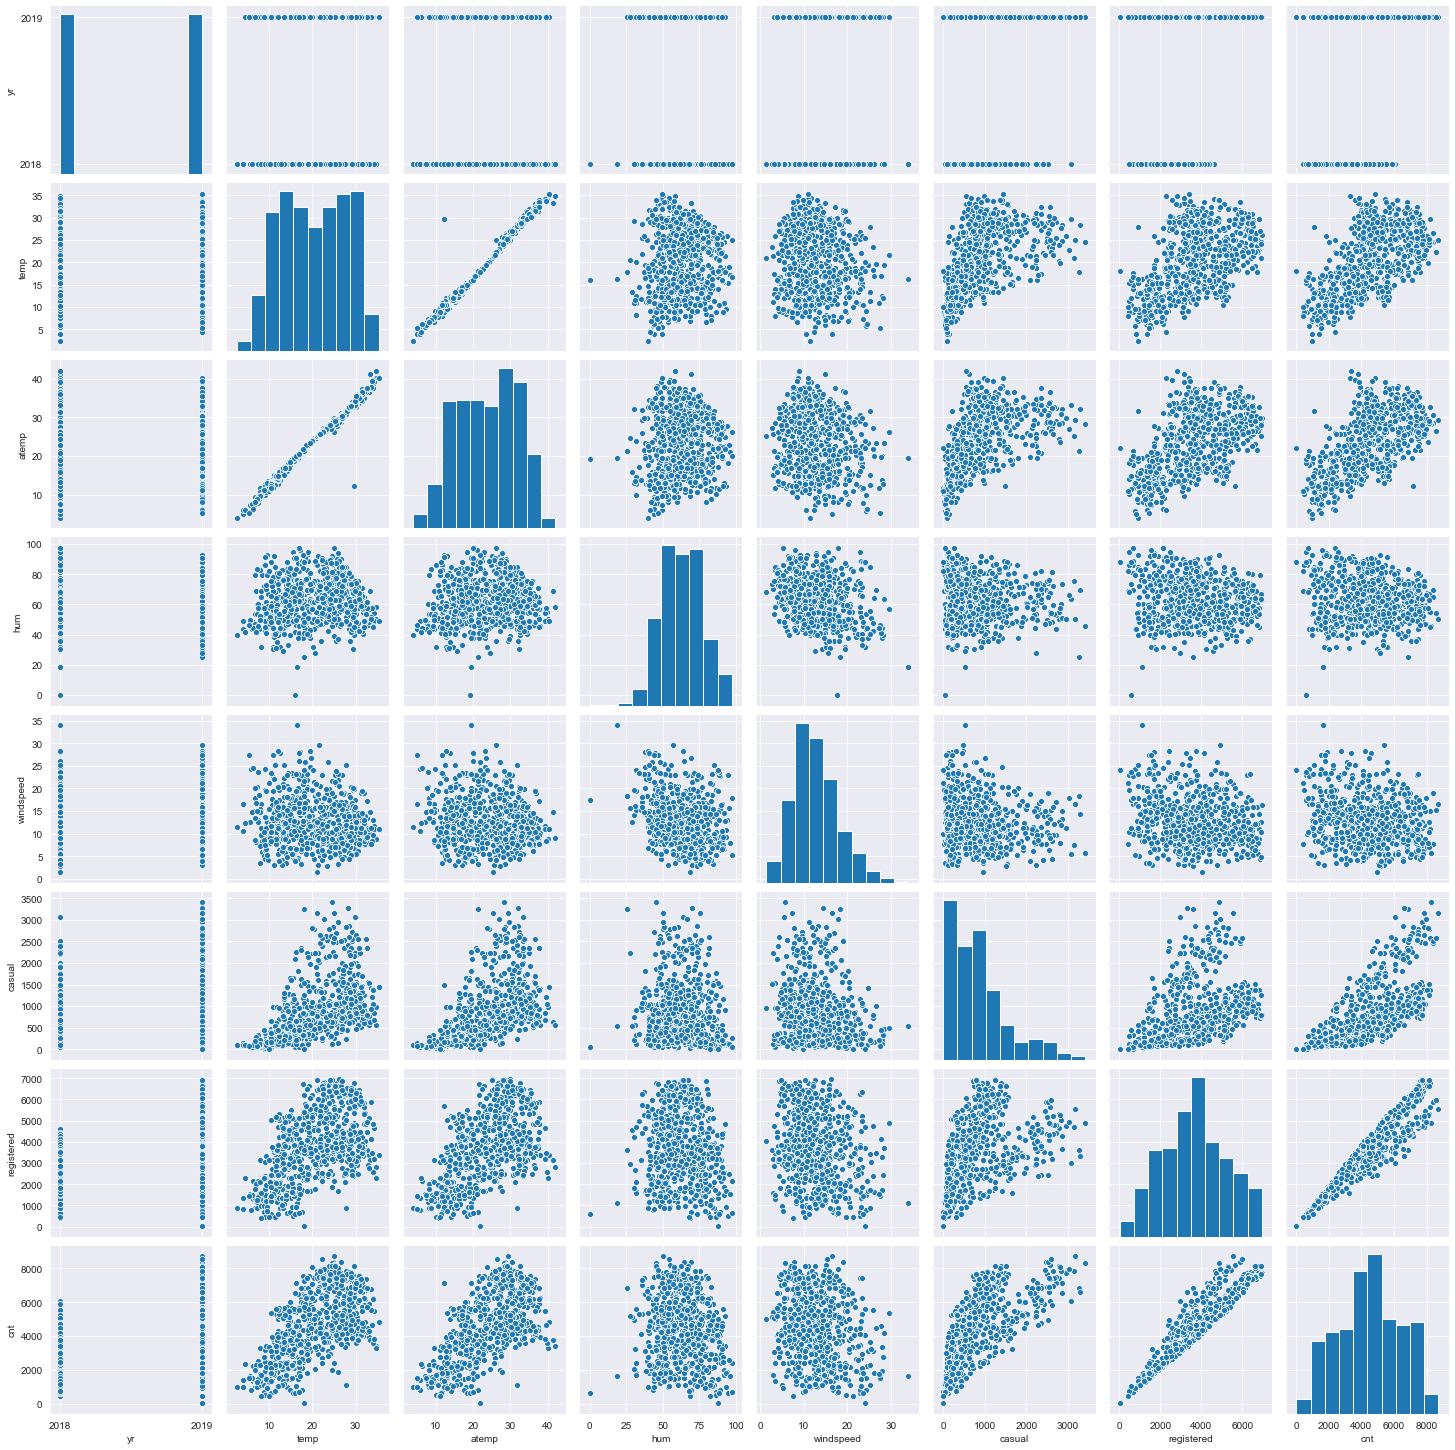

In [17]:
# Creating a pairplot
sns.pairplot(bikeshare);

> With this pairplot we can gather certain insights:

- There is a strong relationship between *registered* and *cnt* columns.
- There also a quite strong relationship between *temp* and *dtemp*.
- There are other relationships as well but they seem to be weaker than the other two.
- *cnt* vs *temp/dtemp/casual* have relationships.
- *casual* vs *temp/dtemp* and *registered* vs *temp/dtemp* have relationships.

In [18]:
#Numerical Columns
num_cols = list(bikeshare.describe().columns)
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [19]:
# Categorical Columns
columns = list(bikeshare.columns)
cat_cols = [item for item in columns if item not in num_cols]
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Bar Plots(Categorical Variables)

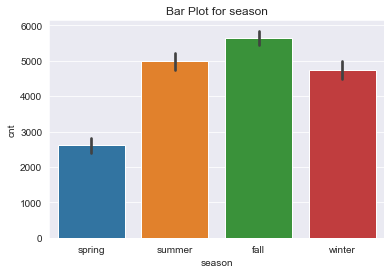

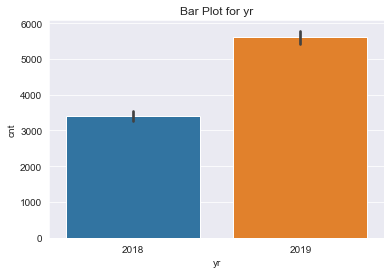

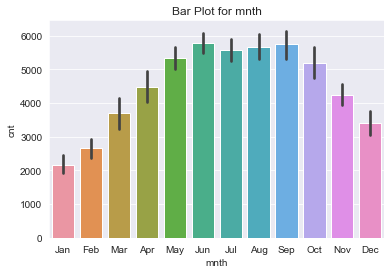

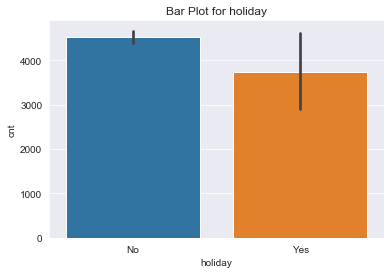

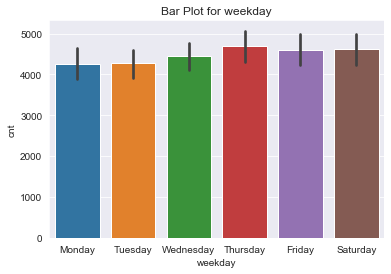

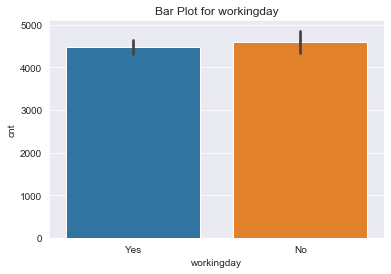

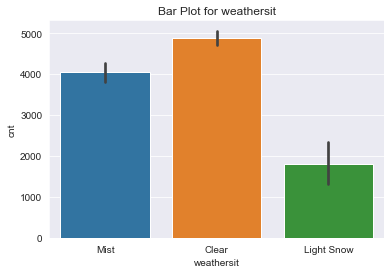

In [20]:
# Creating barplots for categorical variables against cnt variable
for col in cat_cols:
    sns.barplot(x = bikeshare[col], y=bikeshare['cnt'], data=bikeshare)
    plt.title('Bar Plot for ' + col)
    plt.show()

### Insights:

- The most number of rentals in a season is *fall* followed by *summer*, *winter* and *spring* seems to be the season with the least number of rentals.
- 2019 seems to have had more rentals than 2018.
- *September* seems to be the month with most rentals and it makes sense as we saw *fall* season with the most rentals. Also we can see that from *Jun* to *Sep* seems to be the period with the most rentals. *Jan* has the lowest rentals.
- Customers rent more when its not a holiday.
- In a given week *Thursday* seems to be the day with the most rentals with *Friday* and *Saturday* just behind. *Monday* seems to show the lowest rentals during a week.
- Be it a working day or not, the rentals of the bike are somewhat the same.
- Customers rent the bikes most when its a *Clear* day and of course no one rents bikes when there is a spell of heavy rain.

### Boxplots (Categorical Variables)

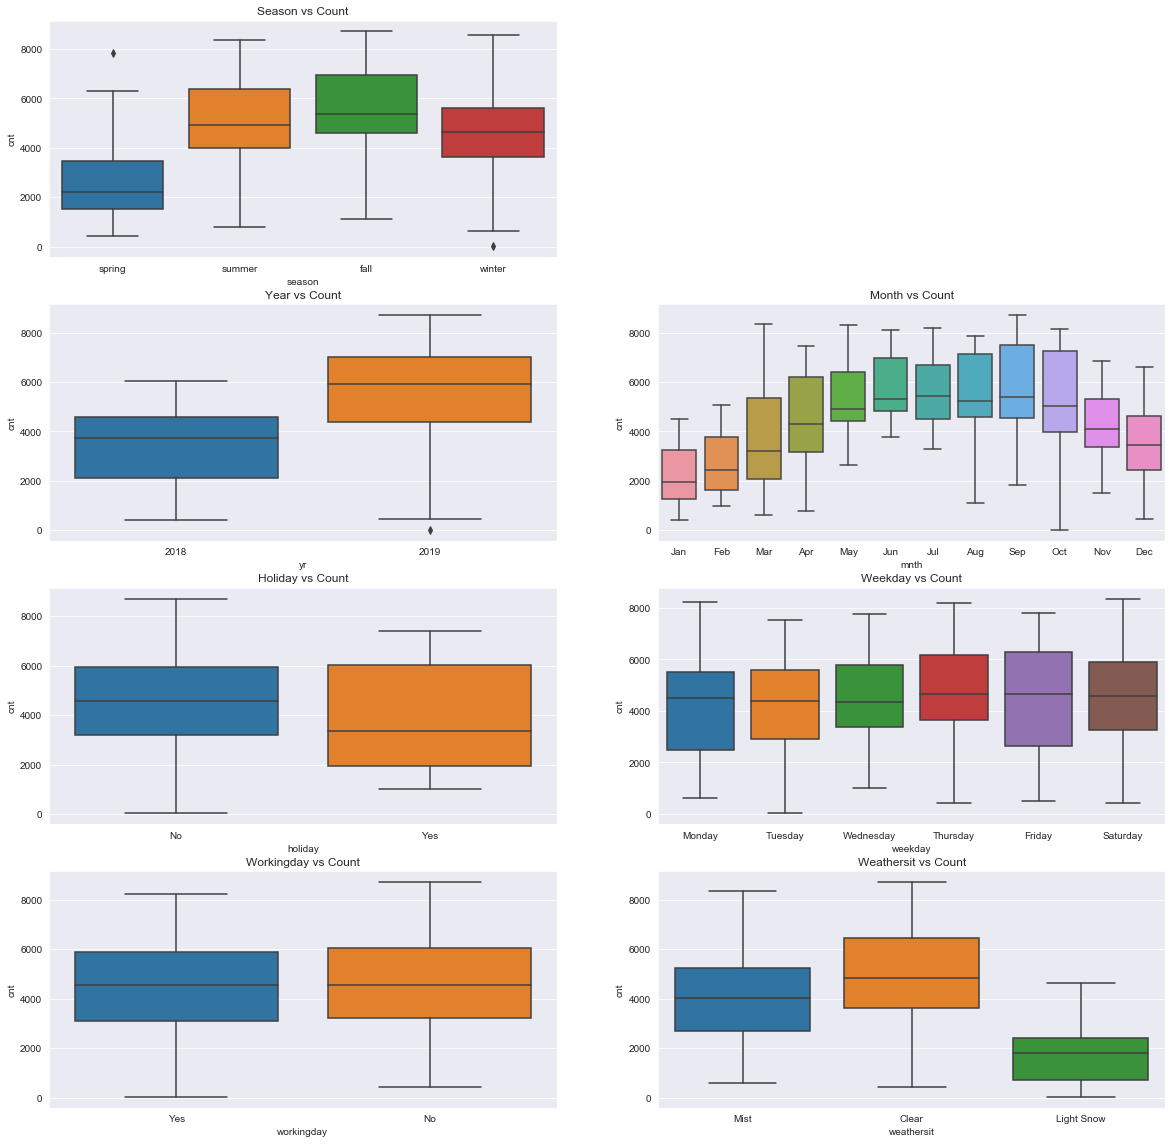

In [21]:
#Plotting boxplots of the categorical variables.

plt.figure(figsize=(20, 20))

plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.title("Season vs Count")

plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare)
plt.title("Year vs Count")

plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.title("Month vs Count")

plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.title("Holiday vs Count")

plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.title("Weekday vs Count")

plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare)
plt.title("Workingday vs Count")

plt.subplot(4,2,8)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.title("Weathersit vs Count")

plt.show()

### Distplots (Numerical Variables)

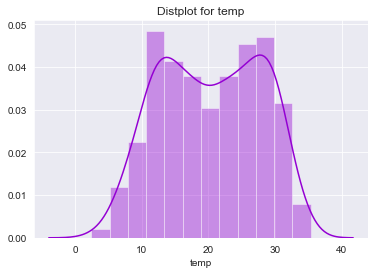

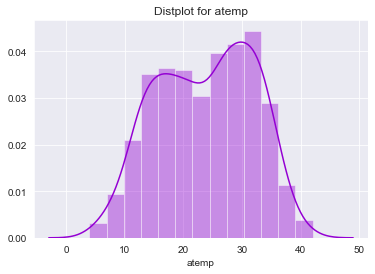

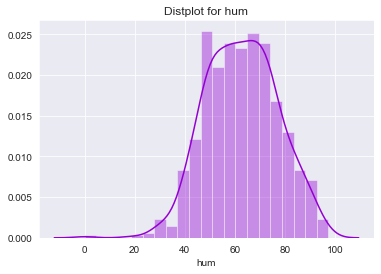

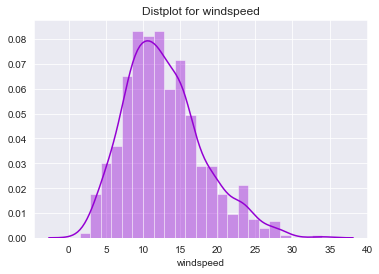

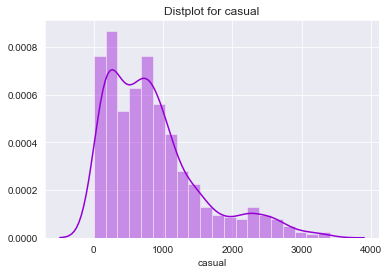

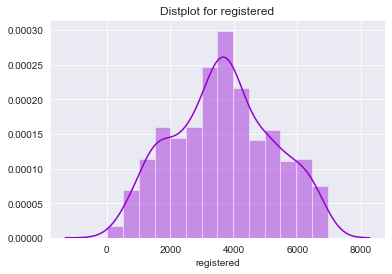

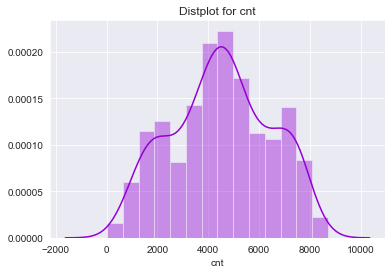

In [22]:
# Creating distplots for numerical variables 
for col in num_cols:
    sns.distplot(bikeshare[col], color = 'darkviolet')
    plt.title('Distplot for ' + col)
    plt.show()

### Insights:

- Distribution for temp and atemp seems to be a bimodal distribution.
- Distribution for humidity and windspeed seems to be normal in nature.
- Distribution for registered also seems to be normal but for casual, it seems like the distribution is not very normally distributed and needs to be looked at.
- cnt is the target variable and the distribution seems normal.

### Scatter Plots (Numerical Variables)

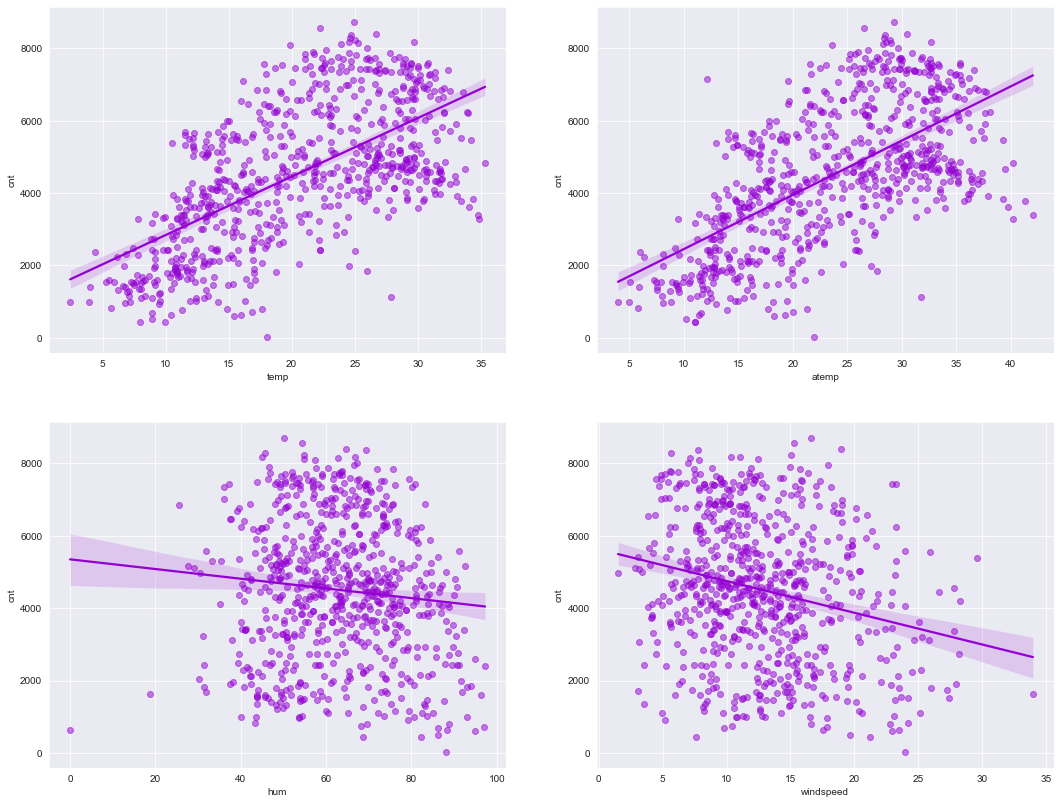

In [23]:
# Plotting regplots for the numerical variables against cnt variable

plt.figure(figsize=(18, 14))

plt.subplot(2,2,1)
sns.regplot(x = 'temp', y = 'cnt', data = bikeshare, color = 'darkviolet', scatter_kws={'alpha':0.50})

plt.subplot(2,2,2)
sns.regplot(x = 'atemp', y ='cnt', data = bikeshare, color = 'darkviolet', scatter_kws={'alpha':0.50})

plt.subplot(2,2,3)
sns.regplot(x = 'hum', y = 'cnt', data = bikeshare, color = 'darkviolet', scatter_kws={'alpha':0.50})

plt.subplot(2,2,4)
sns.regplot(x = 'windspeed', y = 'cnt', data = bikeshare, color = 'darkviolet', scatter_kws={'alpha':0.50})

plt.show()

### Insights

- By looking at the first subplot we can see that there is a positive relationship between **cnt** and **temp**, with the points being randomly distrubuted.
- The second subplot shows us a positive relationship between **cnt** and **temp**, with the points being randomly distributed.
- The third subplot shows us a flatter negative relationship between **cnt** and **hum**. However, by looking at the points we don't see much of a clear relationship.
- The fourth subplot shows us a negative relationship between **cnt** and **windspeed**.

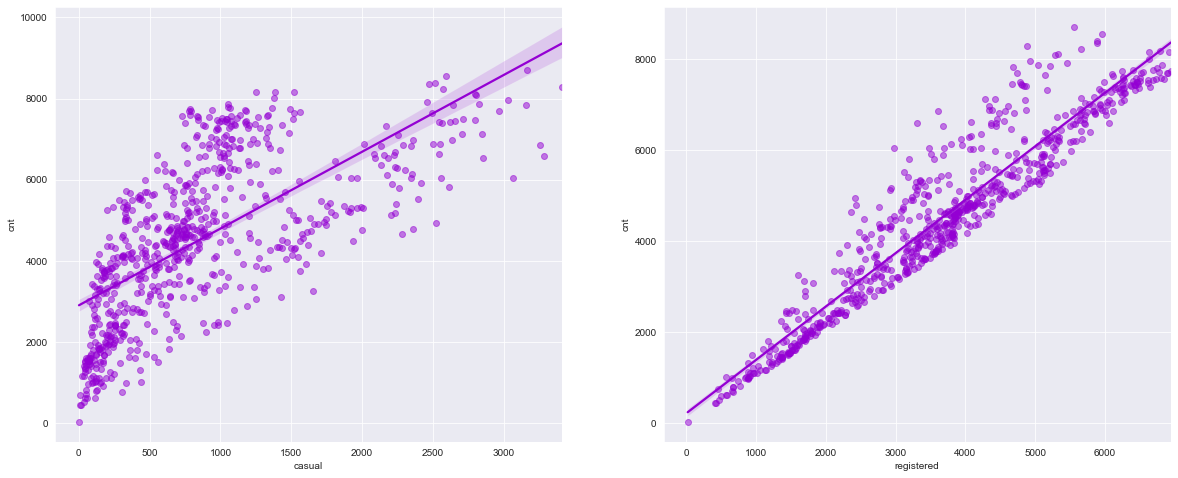

In [24]:
# Plotting registered and casual variables against cnt variable

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.regplot(x = 'casual', y = 'cnt', data = bikeshare, color = 'darkviolet', scatter_kws={'alpha':0.50})

plt.subplot(1,2,2)
sns.regplot(x = 'registered', y = 'cnt', data = bikeshare, color = 'darkviolet', scatter_kws={'alpha':0.50})

plt.show()

> There seems to be a good positive relationship between **cnt** and **casual** variables. **registered** and **cnt** varaibles also have a positive relationship however, their relationship seems to be the strongest amongst all other numerical variables.

In [25]:
# Function to check if there exist any outliers in the column.

outliers = []
def z_score(df, column):
    for i in column:
        z = (i - np.mean(column))/np.std(column)
        if np.abs(z) > 3:
            outliers.append(i)
    return outliers

In [26]:
# Checking the outliers for the various Numerical Variables.

a = z_score(df=bikeshare, column=bikeshare['cnt'])
print(a)

b = z_score(df=bikeshare, column=bikeshare['temp'])
print(b)

c = z_score(df=bikeshare, column=bikeshare['atemp'])
print(c)

d = z_score(df=bikeshare, column=bikeshare['hum'])
print(d)

e = z_score(df=bikeshare, column=bikeshare['windspeed'])
print(e)

[]
[]
[]
[18.7917, 0.0]
[18.7917, 0.0, 34.000021000000004, 29.584721000000002]


In [27]:
# Getting rid of the rows having outliers in the 'hum' column.

from scipy.stats import zscore

z_scores = zscore(bikeshare['hum'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
bikeshare = bikeshare[filtered_entries]
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [28]:
# Getting rid of the rows having outliers in the 'windspeed' column.

z_scores = zscore(bikeshare['windspeed'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
bikeshare = bikeshare[filtered_entries]
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
# Looking at the shape

bikeshare.shape

(725, 14)

In [30]:
# Let's describe the dataset now

bikeshare.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,20.341627,23.750374,62.951486,12.661751,852.551724,3666.452414,4519.004138
std,7.522706,8.164576,13.970282,5.046105,687.529549,1556.660818,1932.901983
min,2.424346,3.953480,25.416700,1.500244,2.000000,20.000000,22.000000
25%,13.803347,16.887300,52.208300,9.000914,316.000000,2507.000000,3194.000000
50%,20.602500,24.462900,62.750000,12.041843,724.000000,3667.000000,4553.000000
75%,26.889153,30.524400,73.041700,15.583932,1100.000000,4790.000000,5986.000000
max,35.328347,42.044800,97.250000,27.999836,3410.000000,6946.000000,8714.000000


In [31]:
# Having a look at the correlation of the numerical variables

bikeshare.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991721,0.123278,-0.155395,0.542052,0.538877,0.626791
atemp,0.991721,1.000000,0.136447,-0.182099,0.542862,0.543094,0.630475
hum,0.123278,0.136447,1.000000,-0.229375,-0.088424,-0.112580,-0.122119
windspeed,-0.155395,-0.182099,-0.229375,1.000000,-0.161548,-0.214596,-0.230287
casual,0.542052,0.542862,-0.088424,-0.161548,1.000000,0.392534,0.671825
registered,0.538877,0.543094,-0.112580,-0.214596,0.392534,1.000000,0.944973
cnt,0.626791,0.630475,-0.122119,-0.230287,0.671825,0.944973,1.000000


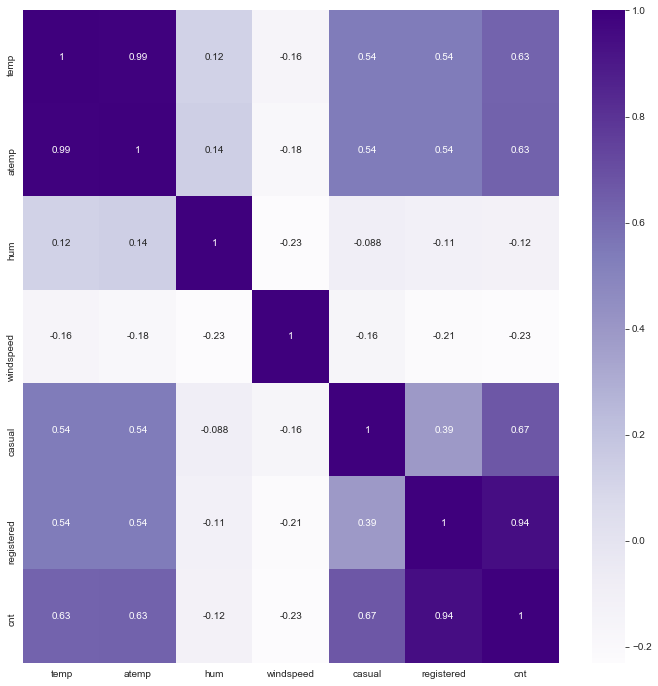

In [32]:
# Plotting a heatmap for the same

plt.figure(figsize=(12,12))

sns.heatmap(bikeshare.corr(), annot = True, cmap='Purples');

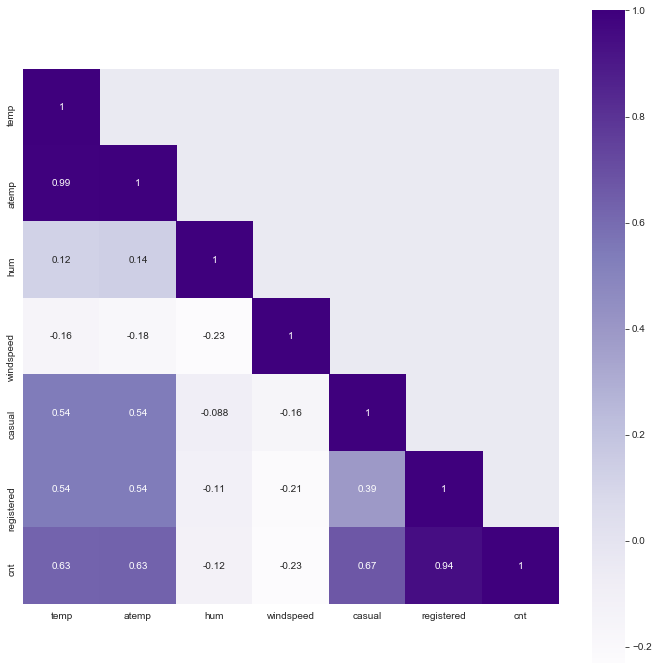

In [33]:
#For better clarity, let's have a look only at the required features in the heatmap.

mask = np.array(bikeshare[num_cols].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(bikeshare[num_cols].corr(), mask=mask, square=True, annot=True, cmap="Purples");

### Insights

- By looking at the heatmap we can see that atemp and temp have a correlation of 0.99, which is a case of multicollinearity. This means that atemp varaible is able to explain 99% of the variance of temp variable. This could therefore lead to overfitting of the regression model.
- The correlation of registered variable with cnt variable is also very high at 0.94. This is not desirable.
- The correlation between casual and cnt varaible is high at 0.67. This again is not desirable.

In [34]:
#Removing the 'casual' and 'registered' columns.

bikeshare.drop(['casual', 'registered'], axis=1, inplace=True)

#Confirming whether the rows have been dropped or not.

bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation

In [35]:
# Having a look at the categorical columns
print(cat_cols)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [36]:
# Creating dummies for the categorical columns 
cat_dum = pd.get_dummies(bikeshare[cat_cols], drop_first = True)
cat_dum.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


> In the above code we remove one value from each category as we will know if they're not here then the value is going to be the one that has been dropped.

In [37]:
# Concatenating the ca_dum dataframe with bikeshare

bikeshare = pd.concat([bikeshare, cat_dum], axis = 1)

# Looking at the dataframe
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,1,0,1
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,1,0,1
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Dropping the unnecessary columns

bikeshare.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], axis = 1, inplace = True)

# Checking if it gets executed
bikeshare.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the data into training and testing data sets

The model will be built on the training dataset and tested on the testing dataset

In [39]:
#Splitting the Data into train and test data and importing the necessary libraries. 

from sklearn.model_selection import train_test_split
train, test = train_test_split(bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

It is important to rescale the variables in order to have proper comparison amongst them. If we don't do so, we may end up with a model having variables with either very large or very small values.

In [40]:
#Importing the necessary class.

from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables.

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
642,0.692641,0.670569,0.519721,0.171647,0.932633,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
728,0.245101,0.204242,0.319025,0.826667,0.164795,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
479,0.520271,0.523547,0.241879,0.204993,0.696004,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
113,0.651106,0.632534,0.774941,0.401664,0.453942,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
685,0.331287,0.330942,0.405453,0.368308,0.627550,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Lets have a look at the describe of the training dataset

train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.538071,0.523087,0.526962,0.394869,0.492324,0.244576,0.242604,0.254438,0.506903,0.088757,...,0.086785,0.031558,0.157791,0.136095,0.140039,0.143984,0.145957,0.690335,0.025641,0.349112
std,0.225799,0.215599,0.196307,0.200075,0.236431,0.430260,0.429081,0.435975,0.500446,0.284674,...,0.281798,0.174993,0.364905,0.343228,0.347371,0.351420,0.353411,0.462812,0.158218,0.477160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338555,0.336849,0.374129,0.249140,0.325546,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.531692,0.530310,0.524361,0.378337,0.492334,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.738329,0.705624,0.668503,0.508319,0.676989,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# Lets now have a glance at the corr

train.corr()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
temp,1.000000,0.989470,0.133941,-0.135345,0.639062,-0.607332,0.150455,-0.233508,0.101430,0.368642,...,0.200883,-0.009410,-0.036276,0.022415,-0.006683,0.022753,-0.006969,-0.031979,-0.046399,-0.092540
atemp,0.989470,1.000000,0.147594,-0.162400,0.644288,-0.612147,0.159715,-0.210272,0.102284,0.340193,...,0.198557,-0.012482,-0.033855,0.010560,-0.000881,0.027500,-0.006446,-0.020069,-0.050591,-0.088787
hum,0.133941,0.147594,1.000000,-0.201878,-0.143156,-0.164043,0.015452,0.119699,-0.143956,0.026986,...,0.168296,-0.002010,0.027482,-0.009543,-0.008337,0.009822,-0.020454,0.022193,0.303456,0.516265
windspeed,-0.135345,-0.162400,-0.201878,1.000000,-0.226754,0.136897,0.094475,-0.112217,-0.033260,-0.049746,...,-0.107087,-0.016977,0.002140,-0.024319,0.021817,-0.013319,0.005877,0.011352,0.106780,-0.000284
cnt,0.639062,0.644288,-0.143156,-0.226754,1.000000,-0.544777,0.128891,0.062090,0.597993,0.192681,...,0.204051,-0.074512,-0.063941,0.027907,0.021078,-0.011671,-0.021285,-0.047782,-0.206528,-0.215250
season_spring,-0.607332,-0.612147,-0.164043,0.136897,-0.544777,1.000000,-0.322032,-0.332400,-0.017035,-0.177581,...,-0.175407,0.028526,-0.007125,0.001663,-0.004825,0.028049,0.011715,-0.005970,-0.063273,0.026088
season_summer,0.150455,0.159715,0.015452,0.094475,0.128891,-0.322032,1.000000,-0.330625,-0.012417,-0.176633,...,-0.174471,0.003115,-0.017775,0.030332,0.036796,-0.035519,0.013649,-0.028972,-0.033589,0.039182
season_winter,-0.233508,-0.210272,0.119699,-0.112217,0.062090,-0.332400,-0.330625,1.000000,-0.003537,-0.182320,...,0.012945,-0.001839,0.008012,-0.046967,0.025250,-0.020303,0.002201,0.058246,0.105786,-0.000337
yr_2019,0.101430,0.102284,-0.143956,-0.033260,0.597993,-0.017035,-0.012417,-0.003537,1.000000,0.030371,...,0.023771,-0.025059,-0.005977,0.011778,0.011481,0.022430,-0.028056,-0.012084,-0.089598,-0.055631
mnth_Aug,0.368642,0.340193,0.026986,-0.049746,0.192681,-0.177581,-0.176633,-0.182320,0.030371,1.000000,...,-0.096210,-0.056338,-0.001914,0.017713,-0.046001,0.010287,0.008485,0.014024,-0.050628,0.004218


In [45]:
# X_train, y_train
y_train = train.pop('cnt')
X_train = train

### RFE

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the varaible equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 17),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 19),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', False, 5),
 ('holiday_Yes', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 13),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 18),
 ('workingday_Yes', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', False, 4)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'holiday_Yes', 'weathersit_Light Snow'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes',
       'weathersit_Mist'],
      dtype='object')

### Building a linear regression model.

In [52]:
# Creating X_train dataset with RFE selected variables
X_train_rfe = X_train[col] 

In [53]:
# Importing the library
import statsmodels.api as sm

In [54]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create first model
lr = sm.OLS(y_train, X_train_rfe)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const                    0.271239
temp                     0.324526
atemp                    0.265764
hum                     -0.242790
windspeed               -0.152300
season_spring           -0.108775
season_winter            0.065449
yr_2019                  0.235024
mnth_Jul                -0.099991
holiday_Yes             -0.076529
weathersit_Light Snow   -0.130703
dtype: float64

### Model 1

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     241.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.32e-183
Time:                        11:05:12   Log-Likelihood:                 460.67
No. Observations:                 507   AIC:                            -899.3
Df Residuals:                     496   BIC:                            -852.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2712      0.028      9.563      0.000       0.216       0.327
temp                      0.3245      0.140      2.317      0.021       0.049       0.600
atemp                     0.2658      0.145      1.834      0.067      -0.019       0.550
hum                      -0.2428      0.025     -9.658      0.000      -0.292      -0.193
windspeed                -0.1523      0.023     -6.502      0.000      -0.198      -0.106
season_spring            -0.1088      0.016     -6.613      0.000      -0.141      -0.076
season_winter             0.0654      0.013      4.891      0.000       0.039       0.092
yr_2019                   0.2350      0.009     26.119      0.000       0.217       0.253
mnth_Jul                 -0.1000      0.018     -5.463      0.000      -0.136      -0.064
holiday_Yes              -0.0765      0.025     -3.049      0.002      -0.126      -0.027
weathersit_Light Snow    -0.1307      0.030     -4.364      0.000      -0.190      -0.072
==============================================================================
Omnibus:                       58.747   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.052
Skew:                          -0.668   Prob(JB):                     2.32e-26
Kurtosis:                       4.950   Cond. No.                         71.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`atemp` is insignificant as its p value is high. Therefore we drop the variable.

In [56]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

### Model 2

In [57]:
# Add a constant
X_train_2 = sm.add_constant(X_train_new)

# Create first model
lr = sm.OLS(y_train, X_train_2)

# Fit
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.35e-184
Time:                        11:09:43   Log-Likelihood:                 458.96
No. Observations:                 507   AIC:                            -897.9
Df Residuals:                     497   BIC:                            -855.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2764      0.028      9.770      0.000       0.221       0.332
temp                      0.5741      0.033     17.372      0.000       0.509       0.639
hum                      -0.2395      0.025     -9.528      0.000      -0.289      -0.190
windspeed                -0.1590      0.023     -6.860      0.000      -0.205      -0.113
season_spring            -0.1094      0.016     -6.634      0.000      -0.142      -0.077
season_winter             0.0675      0.013      5.047      0.000       0.041       0.094
yr_2019                   0.2353      0.009     26.093      0.000       0.218       0.253
mnth_Jul                 -0.0993      0.018     -5.411      0.000      -0.135      -0.063
holiday_Yes              -0.0777      0.025     -3.089      0.002      -0.127      -0.028
weathersit_Light Snow    -0.1335      0.030     -4.452      0.000      -0.192      -0.075
==============================================================================
Omnibus:                       58.158   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.731
Skew:                          -0.660   Prob(JB):                     2.72e-26
Kurtosis:                       4.958   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Collinearity test (VIF)

In [58]:
# Checking the VIF values of the feature variables.
#Importing the necessary class first.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jul', 'holiday_Yes', 'weathersit_Light Snow'],
      dtype='object')

In [62]:
X_train_new = X_train_new.drop(['const'], axis = 1)

In [63]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,9.84
1,hum,8.32
2,windspeed,4.16
5,yr_2019,2.10
3,season_spring,2.03
4,season_winter,1.69
6,mnth_Jul,1.37
8,weathersit_Light Snow,1.18
7,holiday_Yes,1.04


> Any VIF value that is higher than 5 is not desirable, it says that it is collinear with the other variables. Over here, we see that atemp and hum are above 5 and therefore we drop them. However, whenever we plan on dropping variables we must do it one by one, incase its just one variable that is multicollinear.

### Model 11

In [65]:
# Removing variable atemp
X_train_new = X_train_new.drop(['temp'], axis = 1)
X_train_sm = sm.add_constant(X_train_new)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     163.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.62e-134
Time:                        11:18:23   Log-Likelihood:                 338.68
No. Observations:                 507   AIC:                            -659.4
Df Residuals:                     498   BIC:                            -621.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6205      0.026     24.257      0.000       0.570       0.671
hum                      -0.1665      0.031     -5.305      0.000      -0.228      -0.105
windspeed                -0.1848      0.029     -6.305      0.000      -0.242      -0.127
season_spring            -0.3177      0.014    -22.186      0.000      -0.346      -0.290
season_winter            -0.0615      0.014     -4.367      0.000      -0.089      -0.034
yr_2019                   0.2599      0.011     23.036      0.000       0.238       0.282
mnth_Jul                  0.0138      0.022      0.634      0.526      -0.029       0.056
holiday_Yes              -0.0687      0.032     -2.158      0.031      -0.131      -0.006
weathersit_Light Snow    -0.1863      0.038     -4.932      0.000      -0.261      -0.112
==============================================================================
Omnibus:                       44.328   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.200
Skew:                          -0.540   Prob(JB):                     8.58e-19
Kurtosis:                       4.664   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Calculating RFE

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,hum,3.68
1,windspeed,3.32
4,yr_2019,1.84
3,season_winter,1.54
2,season_spring,1.51
5,mnth_Jul,1.14
7,weathersit_Light Snow,1.10
6,holiday_Yes,1.03


> Now all the values are under 5. However, mnth_Jul is now insignificant. Therefore it must be removed.

### Model 12

In [67]:
# Removing variable mnth_Jul
X_train_new = X_train_new.drop(['mnth_Jul'], axis = 1)
X_train_sm = sm.add_constant(X_train_new)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     186.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.84e-135
Time:                        11:20:39   Log-Likelihood:                 338.48
No. Observations:                 507   AIC:                            -661.0
Df Residuals:                     499   BIC:                            -627.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6244      0.025     25.149      0.000       0.576       0.673
hum                      -0.1684      0.031     -5.393      0.000      -0.230      -0.107
windspeed                -0.1865      0.029     -6.395      0.000      -0.244      -0.129
season_spring            -0.3199      0.014    -23.030      0.000      -0.347      -0.293
season_winter            -0.0637      0.014     -4.671      0.000      -0.090      -0.037
yr_2019                   0.2598      0.011     23.046      0.000       0.238       0.282
holiday_Yes              -0.0688      0.032     -2.162      0.031      -0.131      -0.006
weathersit_Light Snow    -0.1851      0.038     -4.910      0.000      -0.259      -0.111
==============================================================================
Omnibus:                       44.961   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.699
Skew:                          -0.546   Prob(JB):                     4.05e-19
Kurtosis:                       4.678   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> In this model, we see that the p value of the variable holiday_Yes is 0.031. Since it is insignificant we must drop it.

### Model 13

In [68]:
# Removing variable holiday_Yes
X_train_new = X_train_new.drop(['holiday_Yes'], axis = 1)
X_train_sm = sm.add_constant(X_train_new)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     215.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.20e-135
Time:                        11:22:11   Log-Likelihood:                 336.11
No. Observations:                 507   AIC:                            -658.2
Df Residuals:                     500   BIC:                            -628.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6218      0.025     24.982      0.000       0.573       0.671
hum                      -0.1686      0.031     -5.381      0.000      -0.230      -0.107
windspeed                -0.1854      0.029     -6.337      0.000      -0.243      -0.128
season_spring            -0.3208      0.014    -23.021      0.000      -0.348      -0.293
season_winter            -0.0640      0.014     -4.674      0.000      -0.091      -0.037
yr_2019                   0.2605      0.011     23.028      0.000       0.238       0.283
weathersit_Light Snow    -0.1828      0.038     -4.833      0.000      -0.257      -0.109
==============================================================================
Omnibus:                       49.009   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.831
Skew:                          -0.573   Prob(JB):                     9.41e-22
Kurtosis:                       4.808   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Calculating RFE
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,hum,3.57
1,windspeed,3.30
4,yr_2019,1.83
3,season_winter,1.47
2,season_spring,1.45
5,weathersit_Light Snow,1.10


> Everything seems to be fine the p values are near 0 and the VIF values are well under 5.

- The R-Squared of the model is 0.721
- The Adjusted R-Squared value is 0.718
- The F-Statistic is 215.7

## Residual Analysis

Checking of the error terms to be normally distributed.

In [70]:
#Predicting the y_train_cnt value.

y_train_cnt = lr_model.predict(X_train_sm)

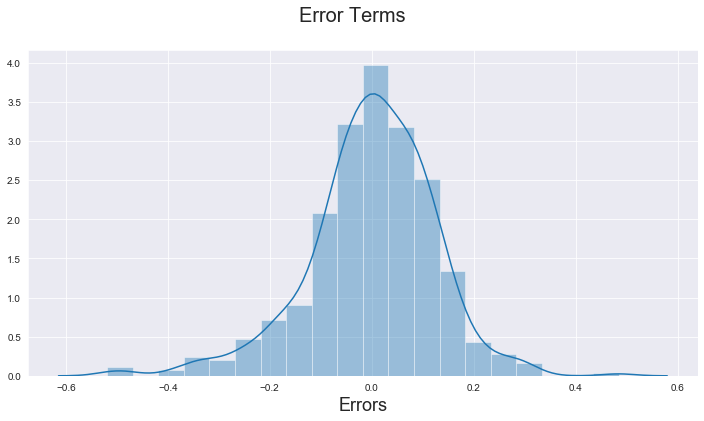

In [71]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=[12,6])
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Making Predictions Using Final Model

We have checked for error terms, now its time to make predictions using our final model.

In [72]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables.

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
test[num_vars] = scaler.transform(test[num_vars])
test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
241,0.722754,0.689995,0.409512,0.221652,0.576240,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
494,0.556613,0.552272,0.414732,0.728332,0.741398,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
591,0.806862,0.769392,0.508700,0.341620,0.834963,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
489,0.700948,0.676485,0.699536,0.296651,0.778945,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
151,0.878510,0.858954,0.588746,0.441643,0.427744,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [73]:
# Describe

test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.559558,0.545490,0.512211,0.389003,0.496373,0.238532,0.279817,0.220183,0.486239,0.077982,...,0.073394,0.022936,0.105505,0.151376,0.151376,0.146789,0.137615,0.692661,0.032110,0.316514
std,0.234907,0.224852,0.190215,0.206324,0.226559,0.427167,0.449942,0.415324,0.500961,0.268760,...,0.261383,0.150043,0.307910,0.359240,0.359240,0.354710,0.345288,0.462453,0.176698,0.466186
min,0.046591,0.026455,0.030161,-0.053367,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360361,0.365473,0.364559,0.243305,0.337740,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.574785,0.575514,0.513341,0.349135,0.505191,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.774412,0.743429,0.652294,0.511217,0.653266,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.019437,0.954151,1.006644,0.961487,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# y_test and X_test

y_test = test.pop('cnt')
X_test = test

In [76]:
# Creating the test set as the train set
X_test_new = X_test[X_train_new.columns]

# Adding constant variable to test dataframe

X_test_new = sm.add_constant(X_test_new)

In [77]:
# Making predictions using the final model.

y_test_pred = lr_model.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

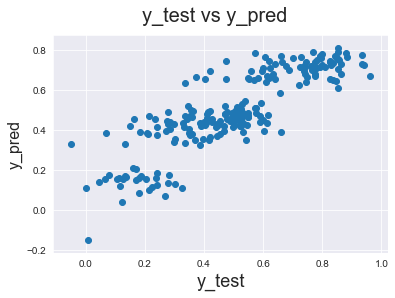

In [78]:
#Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

In [79]:
#Importing the necessary library to compute the R-Squared score.

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7246648969194001

The R-Squared for our final model is **0.7246648969194001**.